In [1]:
import pandas as pd
import matplotlib as plt
import sklearn as sk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\gvvam\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import numpy as np


In [3]:
train_data = pd.read_csv("C:/Users/gvvam/Documents/GitHub/Titanic_competetion_kaggle/train.csv")
test_data = pd.read_csv("C:/Users/gvvam/Documents/GitHub/Titanic_competetion_kaggle/train.csv")

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S


In [7]:
print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
train_data.shape

(891, 12)

In [9]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

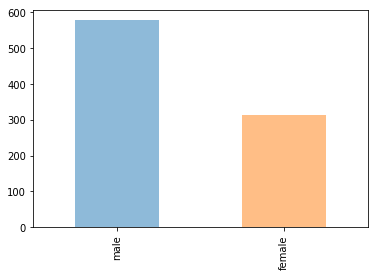

In [11]:
train_data.Sex.value_counts().plot(kind='bar',alpha=0.5)


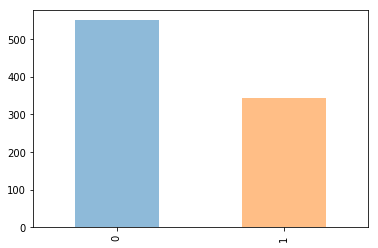

In [12]:
train_data.Survived.value_counts().plot(kind='bar',alpha=0.5)


In [13]:
train_data[train_data.Sex=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [14]:
train_data[train_data.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
train_data.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

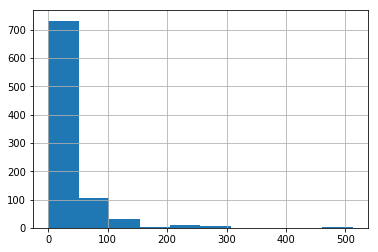

In [16]:
train_data.Fare.hist()

In [17]:
train_data[train_data.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
train_data[train_data.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [19]:
train_data[train_data.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


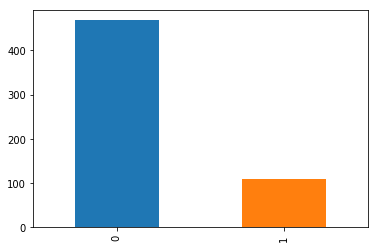

In [20]:
train_data[train_data.Sex=='male'].Survived.value_counts().plot(kind='bar')

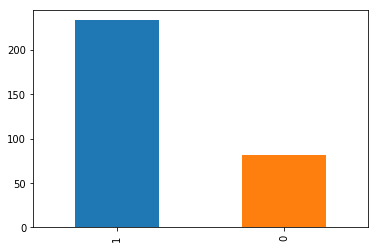

In [21]:
train_data[train_data.Sex=='female'].Survived.value_counts().plot(kind='bar')

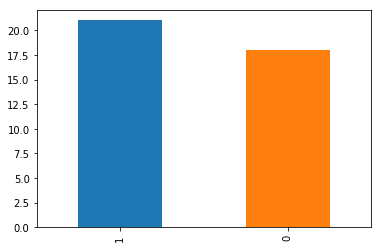

In [22]:
train_data[(train_data.Age<15) & (train_data.Sex=='male')].Survived.value_counts().plot(kind='bar')

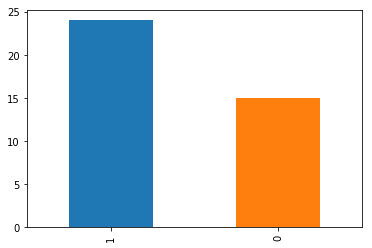

In [23]:
train_data[(train_data.Age<15) & (train_data.Sex=='female')].Survived.value_counts().plot(kind='bar')

In [24]:
train_data[train_data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [25]:
avgAge=train_data.Age.mean()
print(avgAge)

29.69911764705882


In [26]:
train_data.Age=train_data.Age.fillna(value=avgAge)

In [27]:
train_data[train_data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [48]:
train_data[train_data.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,0,1
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,2,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,0,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,1,1,1
12,13,0,3,"Saundercock, Mr. William Henry",0,20.000000,0,0,A/5. 2151,8.0500,NaN,0,0,1
13,14,0,3,"Andersson, Mr. Anders Johan",0,39.000000,1,5,347082,31.2750,NaN,0,0,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.000000,0,0,350406,7.8542,NaN,0,1,0


In [49]:
train_data[train_data.Pclass.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result


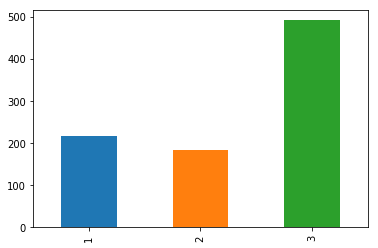

In [28]:
train_data['Pclass'].value_counts().sort_index().plot(kind='bar')

In [29]:
train_data["Hyp"] = 0
train_data.loc[train_data.Sex == "female","Hyp"] = 1

In [30]:
train_data["Result"] = 0
train_data.loc[train_data.Survived == train_data["Hyp"],"Result"] = 1
print(train_data["Result"].value_counts(normalize=True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


In [31]:
medianFare=train_data.Fare.median()
print(medianFare)
train_data.Fare=train_data.Fare.fillna(value=medianFare)

14.4542


In [32]:
train_data.Embarked=train_data.Embarked.fillna(value="S")

In [33]:
train_data.loc[train_data["Embarked"]=="S","Embarked"] = 0
train_data.loc[train_data["Embarked"]=="C","Embarked"] = 1
train_data.loc[train_data["Embarked"]=="Q","Embarked"] = 2



In [34]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.000000,1,1,237789,30.0000,NaN,0,1,1
551,552,0,2,"Sharp, Mr. Percival James R",male,27.000000,0,0,244358,26.0000,NaN,0,0,1
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.000000,0,2,C.A. 31921,26.2500,NaN,0,1,1
839,840,1,1,"Marechal, Mr. Pierre",male,29.699118,0,0,11774,29.7000,C47,1,0,0
778,779,0,3,"Kilgannon, Mr. Thomas J",male,29.699118,0,0,36865,7.7375,NaN,2,0,1


In [35]:
train_data.loc[train_data["Sex"]=="male","Sex"] = 0
train_data.loc[train_data["Sex"]=="female","Sex"] = 1

In [36]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
265,266,0,2,"Reeves, Mr. David",0,36.0,0,0,C.A. 17248,10.5000,NaN,0,0,1
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",1,29.0,0,0,C.A. 29395,10.5000,F33,0,1,1
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,0,1,1
449,450,1,1,"Peuchen, Major. Arthur Godfrey",0,52.0,0,0,113786,30.5000,C104,0,0,0
687,688,0,3,"Dakic, Mr. Branko",0,19.0,0,0,349228,10.1708,NaN,0,0,1


In [57]:
target = train_data["Survived"].values
features = train_data[["Pclass","Age","Sex","SibSp","Parch","Fare","Embarked"]].values

In [58]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features,target)
print(classifier_.score(features,target))

0.800224466891


In [59]:
from sklearn.ensemble import RandomForestRegressor
classifier1 = RandomForestRegressor()
classifier_1 = classifier1.fit(features,target)
print(classifier_1.score(features,target))

0.861332361418


In [60]:
import sklearn.ensemble  as ske
classifier2 = ske.RandomForestClassifier()
classifier_2 = classifier2.fit(features,target)
print(classifier_2.score(features,target))

0.961840628507


In [61]:
import sklearn.naive_bayes as sknb
classifier3 = sknb.GaussianNB()
classifier_3 = classifier3.fit(features,target)
print(classifier_3.score(features,target))

0.793490460157


In [63]:
from sklearn import tree
classifier4 = tree.DecisionTreeClassifier(random_state = 1)
classifier_4 = classifier4.fit(features,target)
print(classifier_4.score(features,target))

0.982042648709


In [64]:
from sklearn import model_selection
scores = model_selection.cross_val_score(classifier4,features,target,scoring='accuracy',cv=50)
print(scores)
print(scores.mean())

[ 0.66666667  0.61111111  0.61111111  0.83333333  0.88888889  0.88888889
  0.61111111  0.88888889  0.72222222  0.83333333  0.72222222  0.61111111
  0.72222222  0.77777778  0.61111111  0.77777778  0.94444444  0.72222222
  0.77777778  0.83333333  0.94444444  0.83333333  0.88888889  0.72222222
  0.61111111  0.83333333  0.94444444  0.88888889  0.72222222  0.83333333
  0.72222222  0.66666667  0.88888889  0.94444444  0.88888889  0.77777778
  0.72222222  0.66666667  0.72222222  0.77777778  0.83333333  0.83333333
  0.76470588  0.88235294  0.70588235  0.76470588  0.82352941  0.94117647
  0.82352941  0.9375    ]
0.787312091503


In [69]:
from sklearn import tree, model_selection
classifier5 = tree.DecisionTreeClassifier(random_state = 1,max_depth=10)
classifier_5 = classifier5.fit(features,target)
print(classifier_5.score(features,target))
scores = model_selection.cross_val_score(classifier5,features,target,scoring='accuracy',cv=50)
print(scores)
print(scores.mean())

0.919191919192
[ 0.72222222  0.61111111  0.66666667  0.94444444  0.88888889  0.88888889
  0.61111111  0.83333333  0.77777778  0.88888889  0.66666667  0.61111111
  0.77777778  0.77777778  0.77777778  0.77777778  0.94444444  0.72222222
  0.88888889  0.88888889  0.83333333  0.77777778  0.88888889  0.77777778
  0.72222222  0.77777778  0.94444444  0.83333333  0.72222222  0.83333333
  0.72222222  0.77777778  0.88888889  0.88888889  0.83333333  0.66666667
  0.72222222  0.77777778  0.72222222  0.77777778  0.83333333  0.83333333
  0.88235294  0.94117647  0.76470588  0.70588235  0.82352941  0.88235294
  0.88235294  0.8125    ]
0.798341503268


In [82]:
tree.export_graphviz(classifier5,out_file="C:/Users/gvvam/Documents/GitHub/Titanic_competetion_kaggle/tree.png")

In [80]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(classifier5,out_file=dot_data,filled = True,rounded = True)